In [0]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [0]:
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [0]:
seed=7
np.random.seed(seed)

In [4]:
top_words=5000
(X_train, y_train),(X_test, y_test)=imdb.load_data(num_words=top_words)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
X=np.concatenate((X_train, X_test), axis=0)
y=np.concatenate((y_train, y_test), axis=0)

In [7]:
print(X.shape)
print(y.shape)

(50000,)
(50000,)


In [8]:
print(np.unique(y))

[0 1]


In [9]:
print(len(np.unique(np.hstack(X))))

4998


Review Length:
Mean 234.76 words (172.911495)


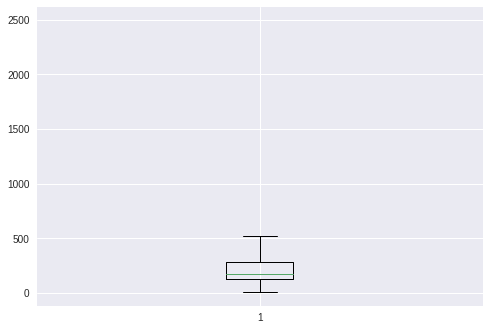

In [11]:
print("Review Length:")
result=[len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
plt.boxplot(result)
plt.show()

In [0]:
X_train=sequence.pad_sequences(X_train, maxlen=500)
X_test=sequence.pad_sequences(X_test, maxlen=500)

In [13]:
Embedding(5000, 32, input_length=500)

In [0]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [0]:
seed=7
np.random.seed(seed)

In [0]:
top_words=5000
(X_train, y_train),(x_test, y_test)=imdb.load_data(num_words=5000)

In [0]:


max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)


In [19]:
model=Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
scores=model.evaluate(X_test,y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 31s - loss: 0.5075 - acc: 0.7145 - val_loss: 0.3145 - val_acc: 0.8636
Epoch 2/2
 - 31s - loss: 0.1899 - acc: 0.9277 - val_loss: 0.3004 - val_acc: 0.8730
Accuracy: 87.30%


For CNN model prediction

In [0]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
top_words=5000
(X_train, y_train),(X_test, y_test)=imdb.load_data(num_words=5000)


In [0]:
max_words=500
X_train=sequence.pad_sequences(X_train , maxlen=max_words)
X_test=sequence.pad_sequences(X_test , maxlen=max_words)

In [27]:
model=Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
scores=model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 36s - loss: 0.4264 - acc: 0.7814 - val_loss: 0.2780 - val_acc: 0.8820
Epoch 2/2
 - 36s - loss: 0.2185 - acc: 0.9159 - val_loss: 0.2760 - val_acc: 0.8850
Accuracy: 88.50%


In [0]:
from sklearn.model_selection import train_test_split
X=X_train
y=y_train
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.10,random_state=42 )


In [30]:
model=Sequential()
model.add(Embedding(top_words, 64, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 64)           320000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 500, 32)           6176      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 251       
Total params: 2,326,677
Trainable params: 2,326,677
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
scores=model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 22500 samples, validate on 25000 samples
Epoch 1/2
 - 41s - loss: 0.4880 - acc: 0.7220 - val_loss: 0.2812 - val_acc: 0.8834
Epoch 2/2
 - 40s - loss: 0.2135 - acc: 0.9166 - val_loss: 0.2774 - val_acc: 0.8854
Accuracy: 88.54%
